In [1]:
a= {}

In [2]:
a["a"], a["b"], a["c"] = 1, 2, 3

In [3]:
a

{'a': 1, 'b': 2, 'c': 3}

In [20]:
from matplotlib import pyplot as plt

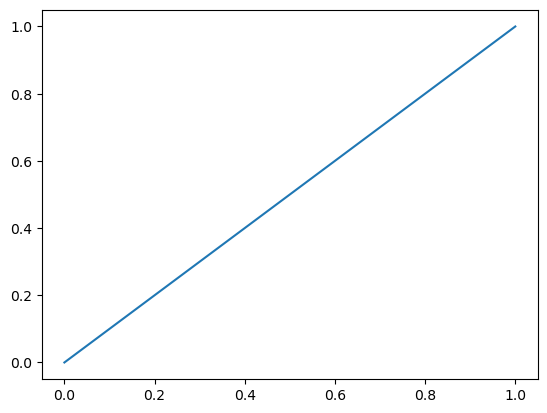

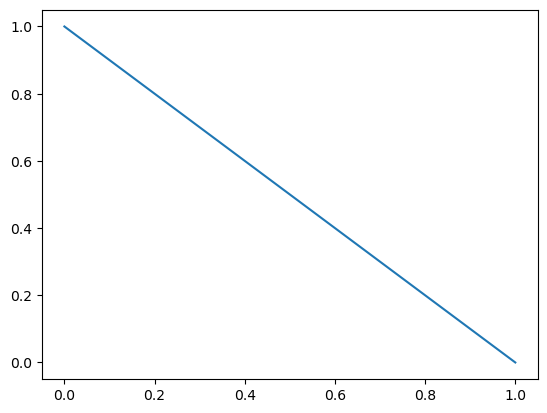

In [25]:
fig1, ax1 = plt.subplots(1, 1)
ax1.plot([0, 1], [0, 1])

fig2, ax2 = plt.subplots(1, 1)
ax2.plot([0, 1], [1, 0])

TypeError: 'Axes' object does not support item assignment

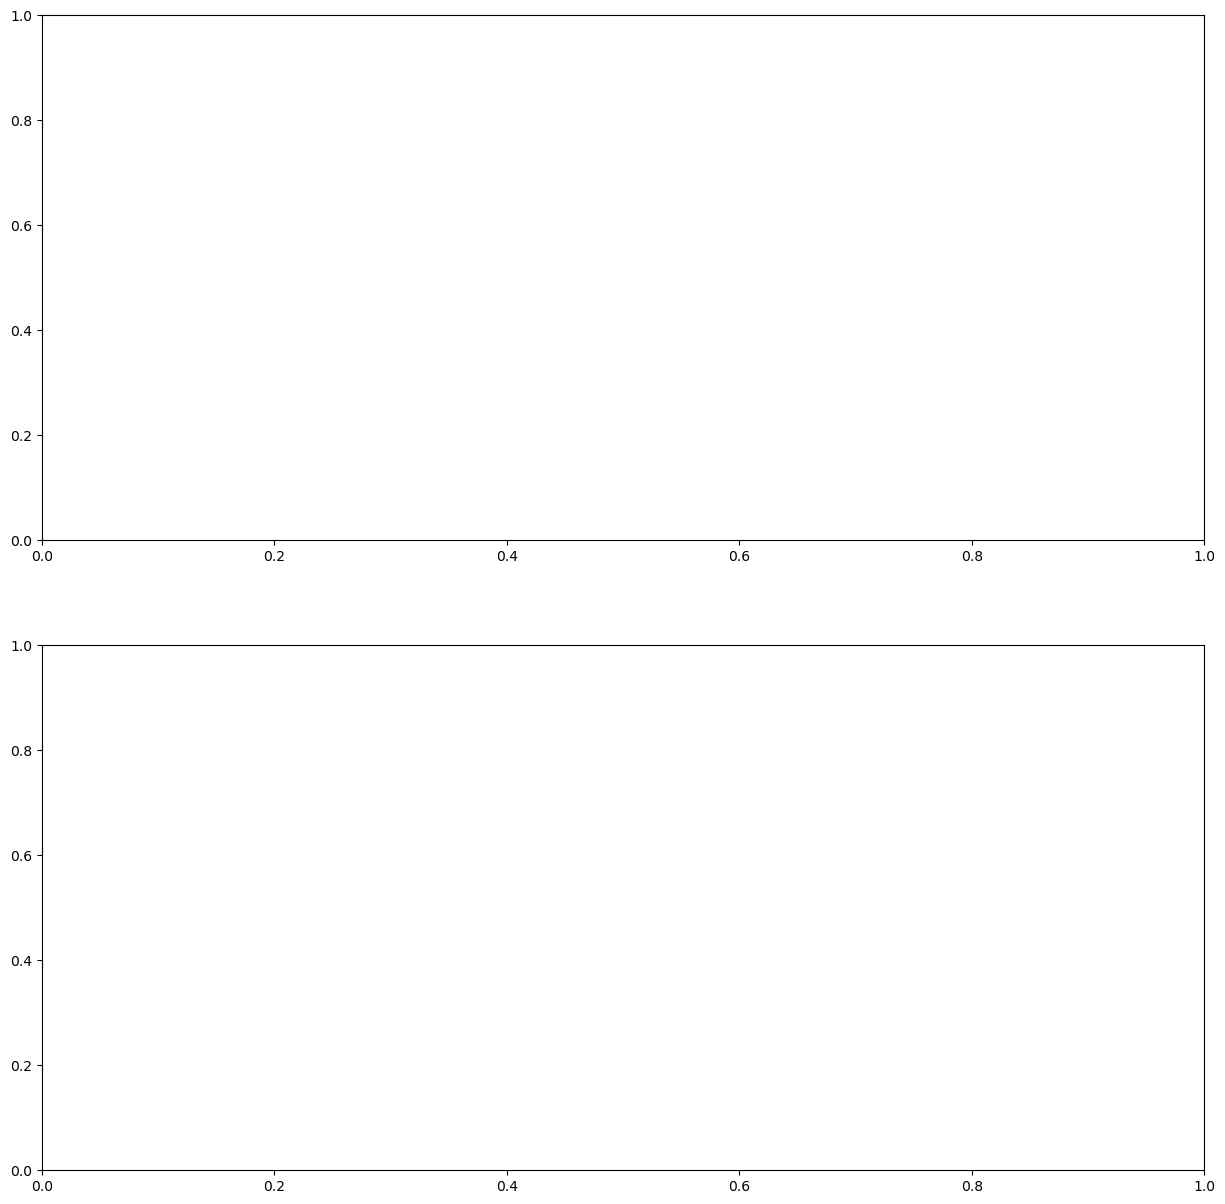

In [27]:
final_fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))



In [36]:
import os
def submitJobGPU(jobName, cmdLine, nH=8, nM=16):
    jobFile = os.path.join(jobName)
    with open(jobFile, 'w') as fh:
        fh.writelines("#!/bin/bash\n")
        fh.writelines('#SBATCH -p gpu\n')
        fh.writelines('#SBATCH -G 1\n')
        fh.writelines('#SBATCH --job-name={}\n'.format(jobName))
        fh.writelines('#SBATCH --output={}.out\n'.format(jobFile))
        fh.writelines('#SBATCH --error={}.err\n'.format(jobFile))
        fh.writelines('#SBATCH --time={}:0:0\n'.format(nH))
        fh.writelines('#SBATCH --mem={}000\n'.format(nM))
        fh.writelines('#SBATCH --qos=normal\n')
        fh.writelines('#SBATCH -C "GPU_SKU:P100_PCIE|GPU_SKU:RTX_2080Ti|GPU_SKU:V100_PCIE|GPU_SKU:V100S_PCIE|GPU_SKU:V100_SXM2"')
        # fh.writelines('#SBATCH --partition=owners\n')
        fh.writelines('#SBATCH --mail-type=ALL\n')
        fh.writelines('#SBATCH --mail-user=kuaifang@stanford.edu\n')
        # if kPath.host == 'icme':
        #     fh.writelines('source activate pytorch\n')
        # elif kPath.host == 'sherlock':
        #     fh.writelines(
        #         'source /home/users/kuaifang/envs/pytorch/bin/activate\n')
        fh.writelines('hostname\n')
        fh.writelines('nvidia-smi -L\n')
        fh.writelines(cmdLine)
    # os.system('sbatch {}'.format(jobFile))

In [37]:
submitJobGPU("TEST", "hi")

In [38]:
import ruamel.yaml

yaml = ruamel.yaml.YAML()
data = yaml.load(open('/Users/andyhuynh/Documents/lfmc/geolearn/app/vegetation/attention/andy/environment.yml'))

requirements = []
for dep in data['dependencies']:
    if isinstance(dep, str):
        package, package_version, python_version = dep.split('=')
        if python_version == '0':
            continue
        requirements.append(package + '==' + package_version)
    elif isinstance(dep, dict):
        for preq in dep.get('pip', []):
            requirements.append(preq)

with open('requirements.txt', 'w') as fp:
    for requirement in requirements:
       print(requirement, file=fp)